In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

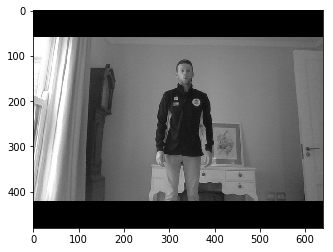

In [2]:
path = "img/05-06-2020_143707/"
img = cv2.imread(path+"frame150.jpg",0)
plt.imshow(img,cmap='gray')

In [6]:
def detect(img, cascade):
    
    face_img = img.copy()
  
    face_rects = cascade.detectMultiScale(face_img, minNeighbors=10) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

### See how it does on a video

In [9]:
upper_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_upperbody.xml')
lower_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_lowerbody.xml')
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

path = 'videos/'
filename = 'goodie.mp4'
file = path+filename

# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture(file)

# FRAMES PER SECOND FOR VIDEO
fps = 50

# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
    
        # Display the frame at same frame rate of recording
        # Watch lecture video for full explanation
        time.sleep(1/fps)
        
        result = detect(frame, lower_cascade)
        cv2.imshow('frame',result)
 
        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            
            break
 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()